In [1]:
import pandas as pd

In [2]:
# Importing data
df = pd.read_excel("../project/DataSet_Assignment09.xlsx")
df.head(2)

Timestamp    OxEnRa   BlFuPeIn        EnOxFl     CoBlFl  \
0 2021-05-12 17:56:25  3.691772  17.661523  16941.904350  36.472670   
1 2021-05-12 17:56:25  3.744628   0.193811  17554.954071  34.087434   

         BlMo   BlFuBoGaVo  BlFuBoGaIn       ThCoTe      ToGaPr  ...  \
0  146.285825  7925.957227   81.975757  2210.712256  224.366480  ...   
1  161.762571  8049.518860   81.637472  2268.780322    0.005692  ...   

       CoBlTe       HoBlTe     ToTe       BlHu   CoInSeVa      FoSI  \
0  212.936183  1087.730999      NaN  13.118669  45.994059  0.481272   
1         NaN     2.082851  1.79588  10.353929   1.580861  0.337968   

          HoBl      ToGasP       CoBF        SI  
0  1075.254532  221.600735  36.796521  0.479000  
1     2.110829    0.005584  34.238289  0.312456  

[2 rows x 25 columns]

In [3]:
# null data analysis
df.isna().sum()/df.shape[0]*100

Timestamp     0.000000
OxEnRa        1.998597
BlFuPeIn      0.999299
EnOxFl        1.998597
CoBlFl        1.998597
BlMo          2.997896
BlFuBoGaVo    1.998597
BlFuBoGaIn    3.997195
ThCoTe        1.998597
ToGaPr        2.997896
EnOxPr        4.996494
CoBlPr        4.996494
ToPrDr        3.997195
HoBlPr        3.997195
AcBlVe        1.998597
CoBlTe        1.998597
HoBlTe        4.996494
ToTe          4.996494
BlHu          0.999299
CoInSeVa      4.996494
FoSI          4.996494
HoBl          4.996494
ToGasP        2.997896
CoBF          1.998597
SI            3.997195
dtype: float64

In [4]:
# Dropping Y column, no interpolation done
print(df.shape)
df = df.dropna(subset=['SI'])
print(df.shape)

(5704, 25)
(5476, 25)


In [5]:
# # interpolating X cols with missing data
for col in df.columns:
    if df[col].isnull().any():
        df[col] = df[col].interpolate(method='linear', limit_direction='both')

In [6]:
# checking for null cols
df.isna().sum()/df.shape[0]*100

Timestamp     0.0
OxEnRa        0.0
BlFuPeIn      0.0
EnOxFl        0.0
CoBlFl        0.0
BlMo          0.0
BlFuBoGaVo    0.0
BlFuBoGaIn    0.0
ThCoTe        0.0
ToGaPr        0.0
EnOxPr        0.0
CoBlPr        0.0
ToPrDr        0.0
HoBlPr        0.0
AcBlVe        0.0
CoBlTe        0.0
HoBlTe        0.0
ToTe          0.0
BlHu          0.0
CoInSeVa      0.0
FoSI          0.0
HoBl          0.0
ToGasP        0.0
CoBF          0.0
SI            0.0
dtype: float64

In [35]:
# Saving imputed data
df.to_csv("imputed_data.csv", index=False)

#### Data distribution analysis

In [8]:
from matplotlib import pyplot as plt

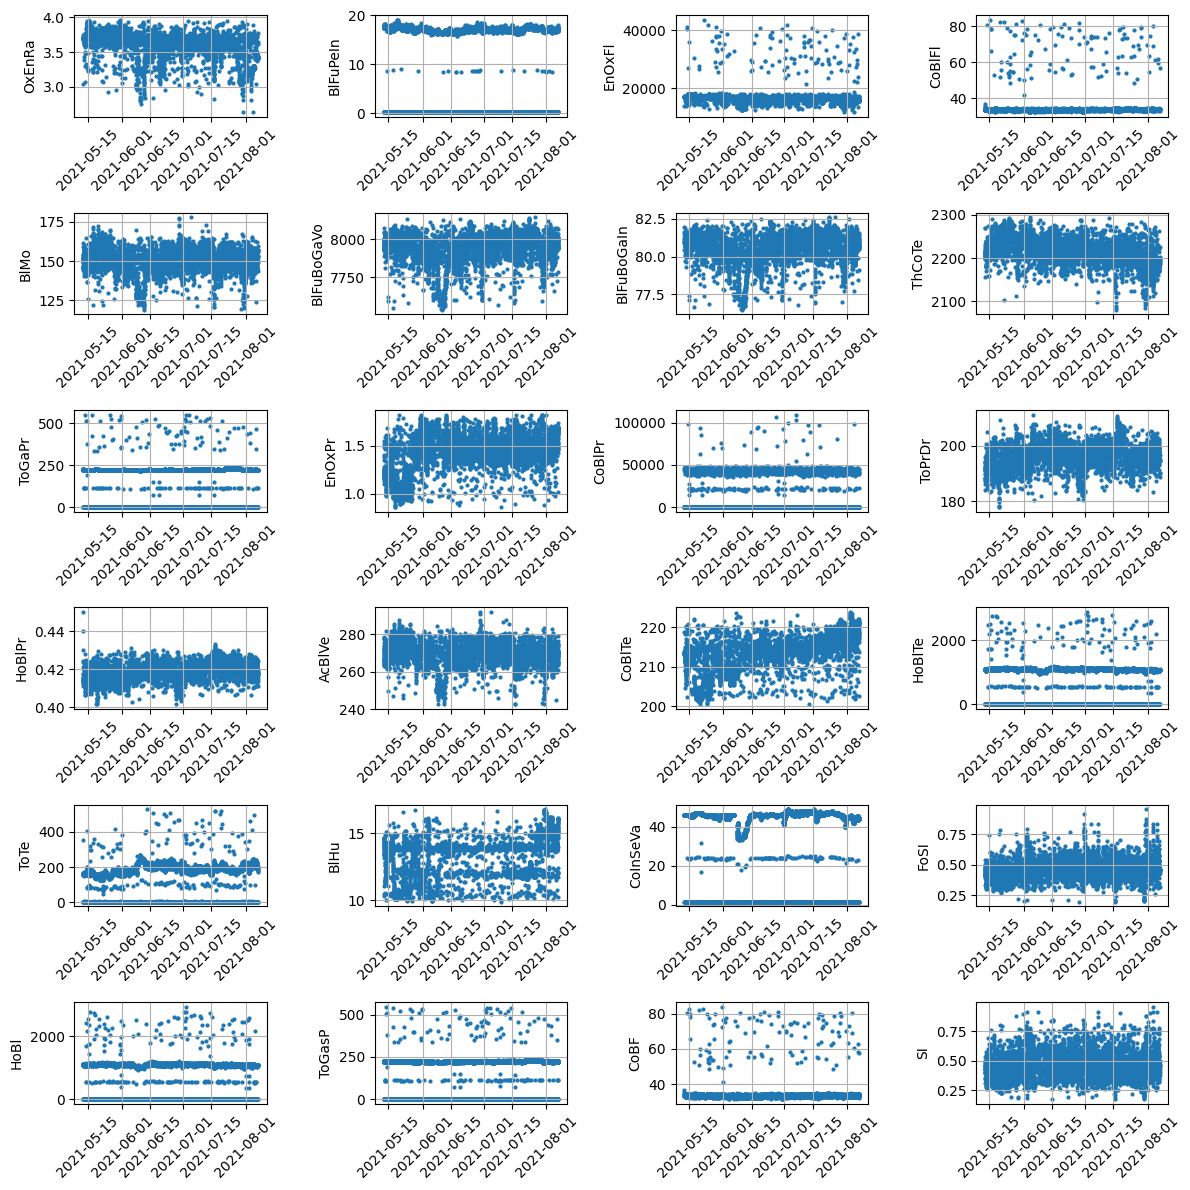

In [45]:
# plotting timeseries data for all variables
fig, axes = plt.subplots(int(len(df.columns[1:])/4), 4, figsize=(12, 12))
axes = axes.ravel()
for ax, col in zip(axes, df.columns[1:]):
    ax.scatter(df.loc[:,'Timestamp'], df[col], s=4)
    ax.set_ylabel(col)
    ax.grid(True)
    ax.tick_params(axis='x', rotation=45) 

plt.tight_layout()
plt.show()

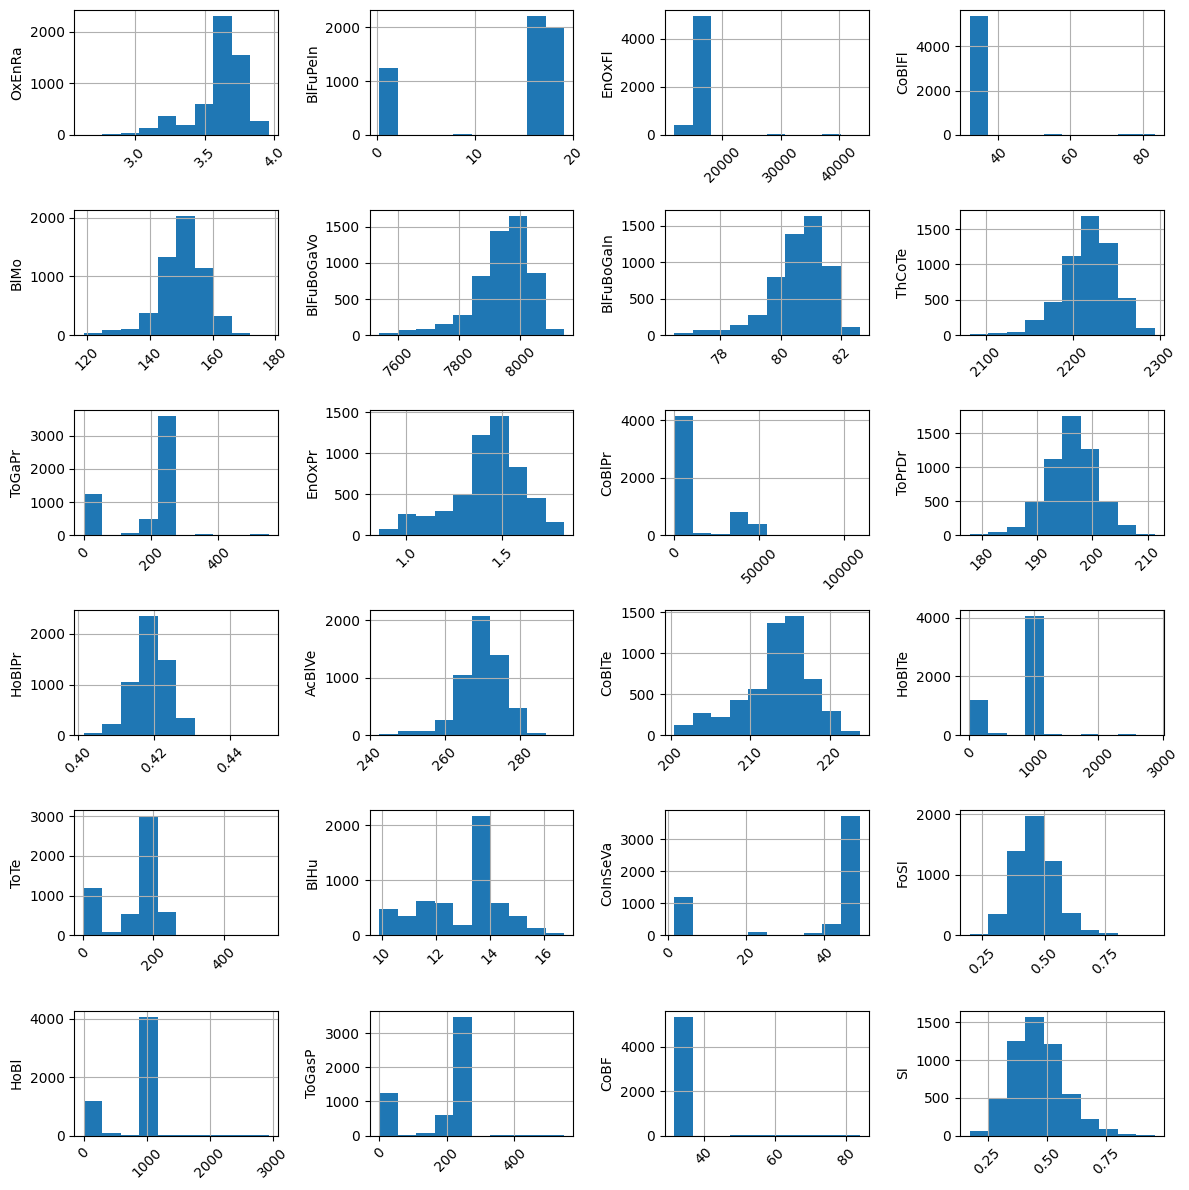

In [46]:
# plotting distribution for all variables
fig, axes = plt.subplots(int(len(df.columns[1:])/4), 4, figsize=(12, 12))
axes = axes.ravel()
for ax, col in zip(axes, df.columns[1:]):
    ax.hist(df[col])
    ax.set_ylabel(col)
    ax.grid(True)
    ax.tick_params(axis='x', rotation=45) 

plt.tight_layout()
plt.show()

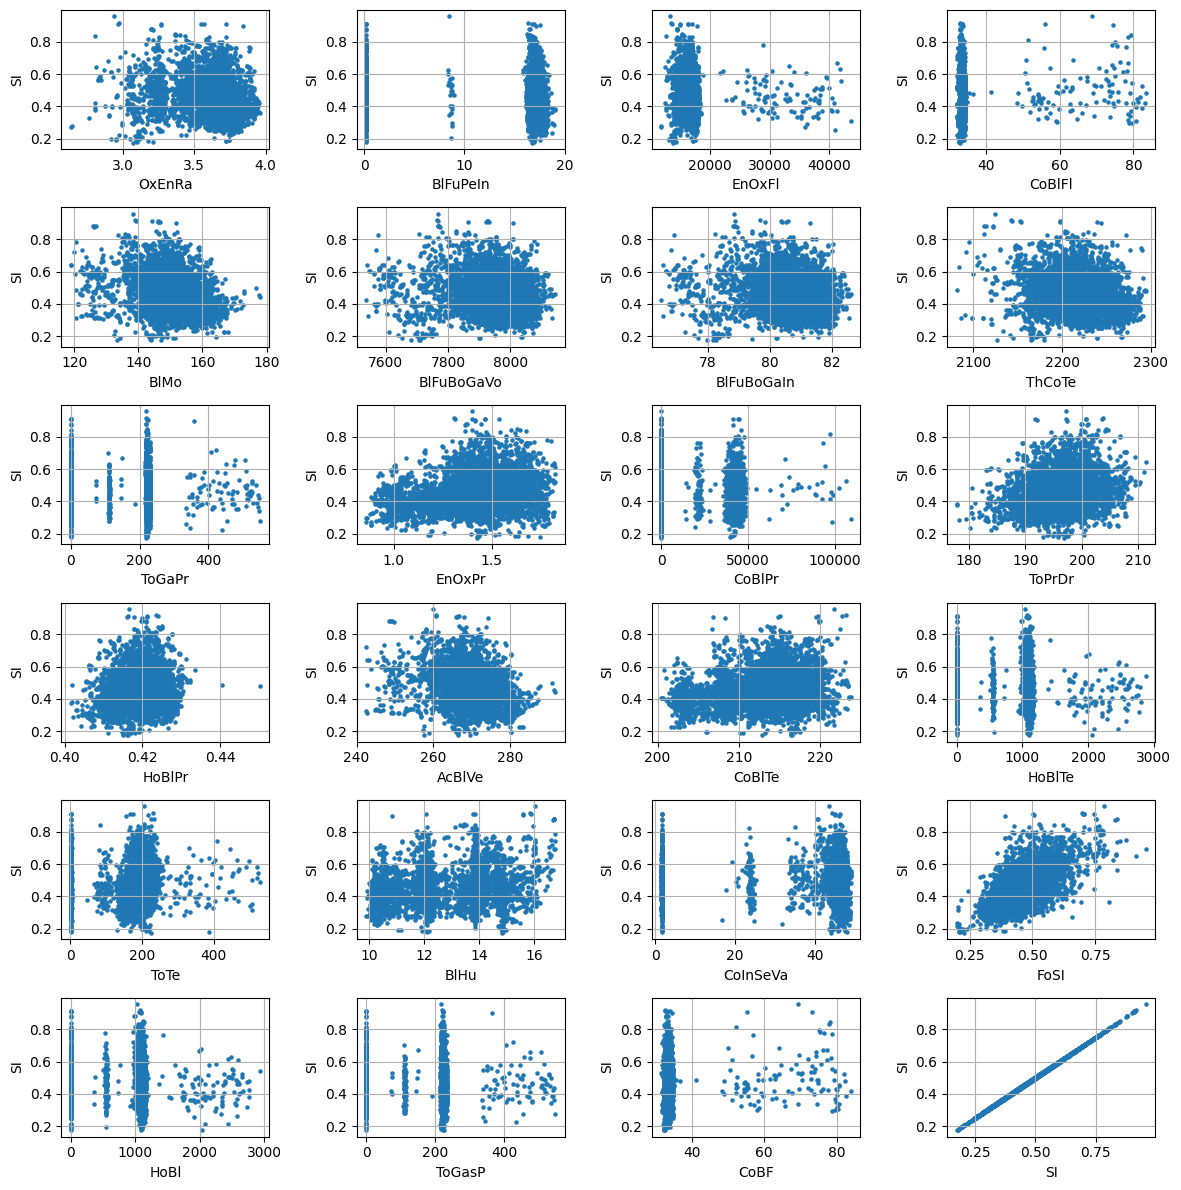

In [10]:
# plotting correlation for all X variables with Y variable
fig, axes = plt.subplots(int(len(df.columns[1:-1])/4)+1, 4, figsize=(12, 12))
axes = axes.ravel()
for ax, col in zip(axes, df.columns[1:]):
    ax.scatter(df[col], df.loc[:,'SI'], s=5)
    ax.set_xlabel(col)
    ax.set_ylabel('SI')
    ax.grid(True)
    # ax.tick_params(axis='x', rotation=45) 

plt.tight_layout()
plt.show()

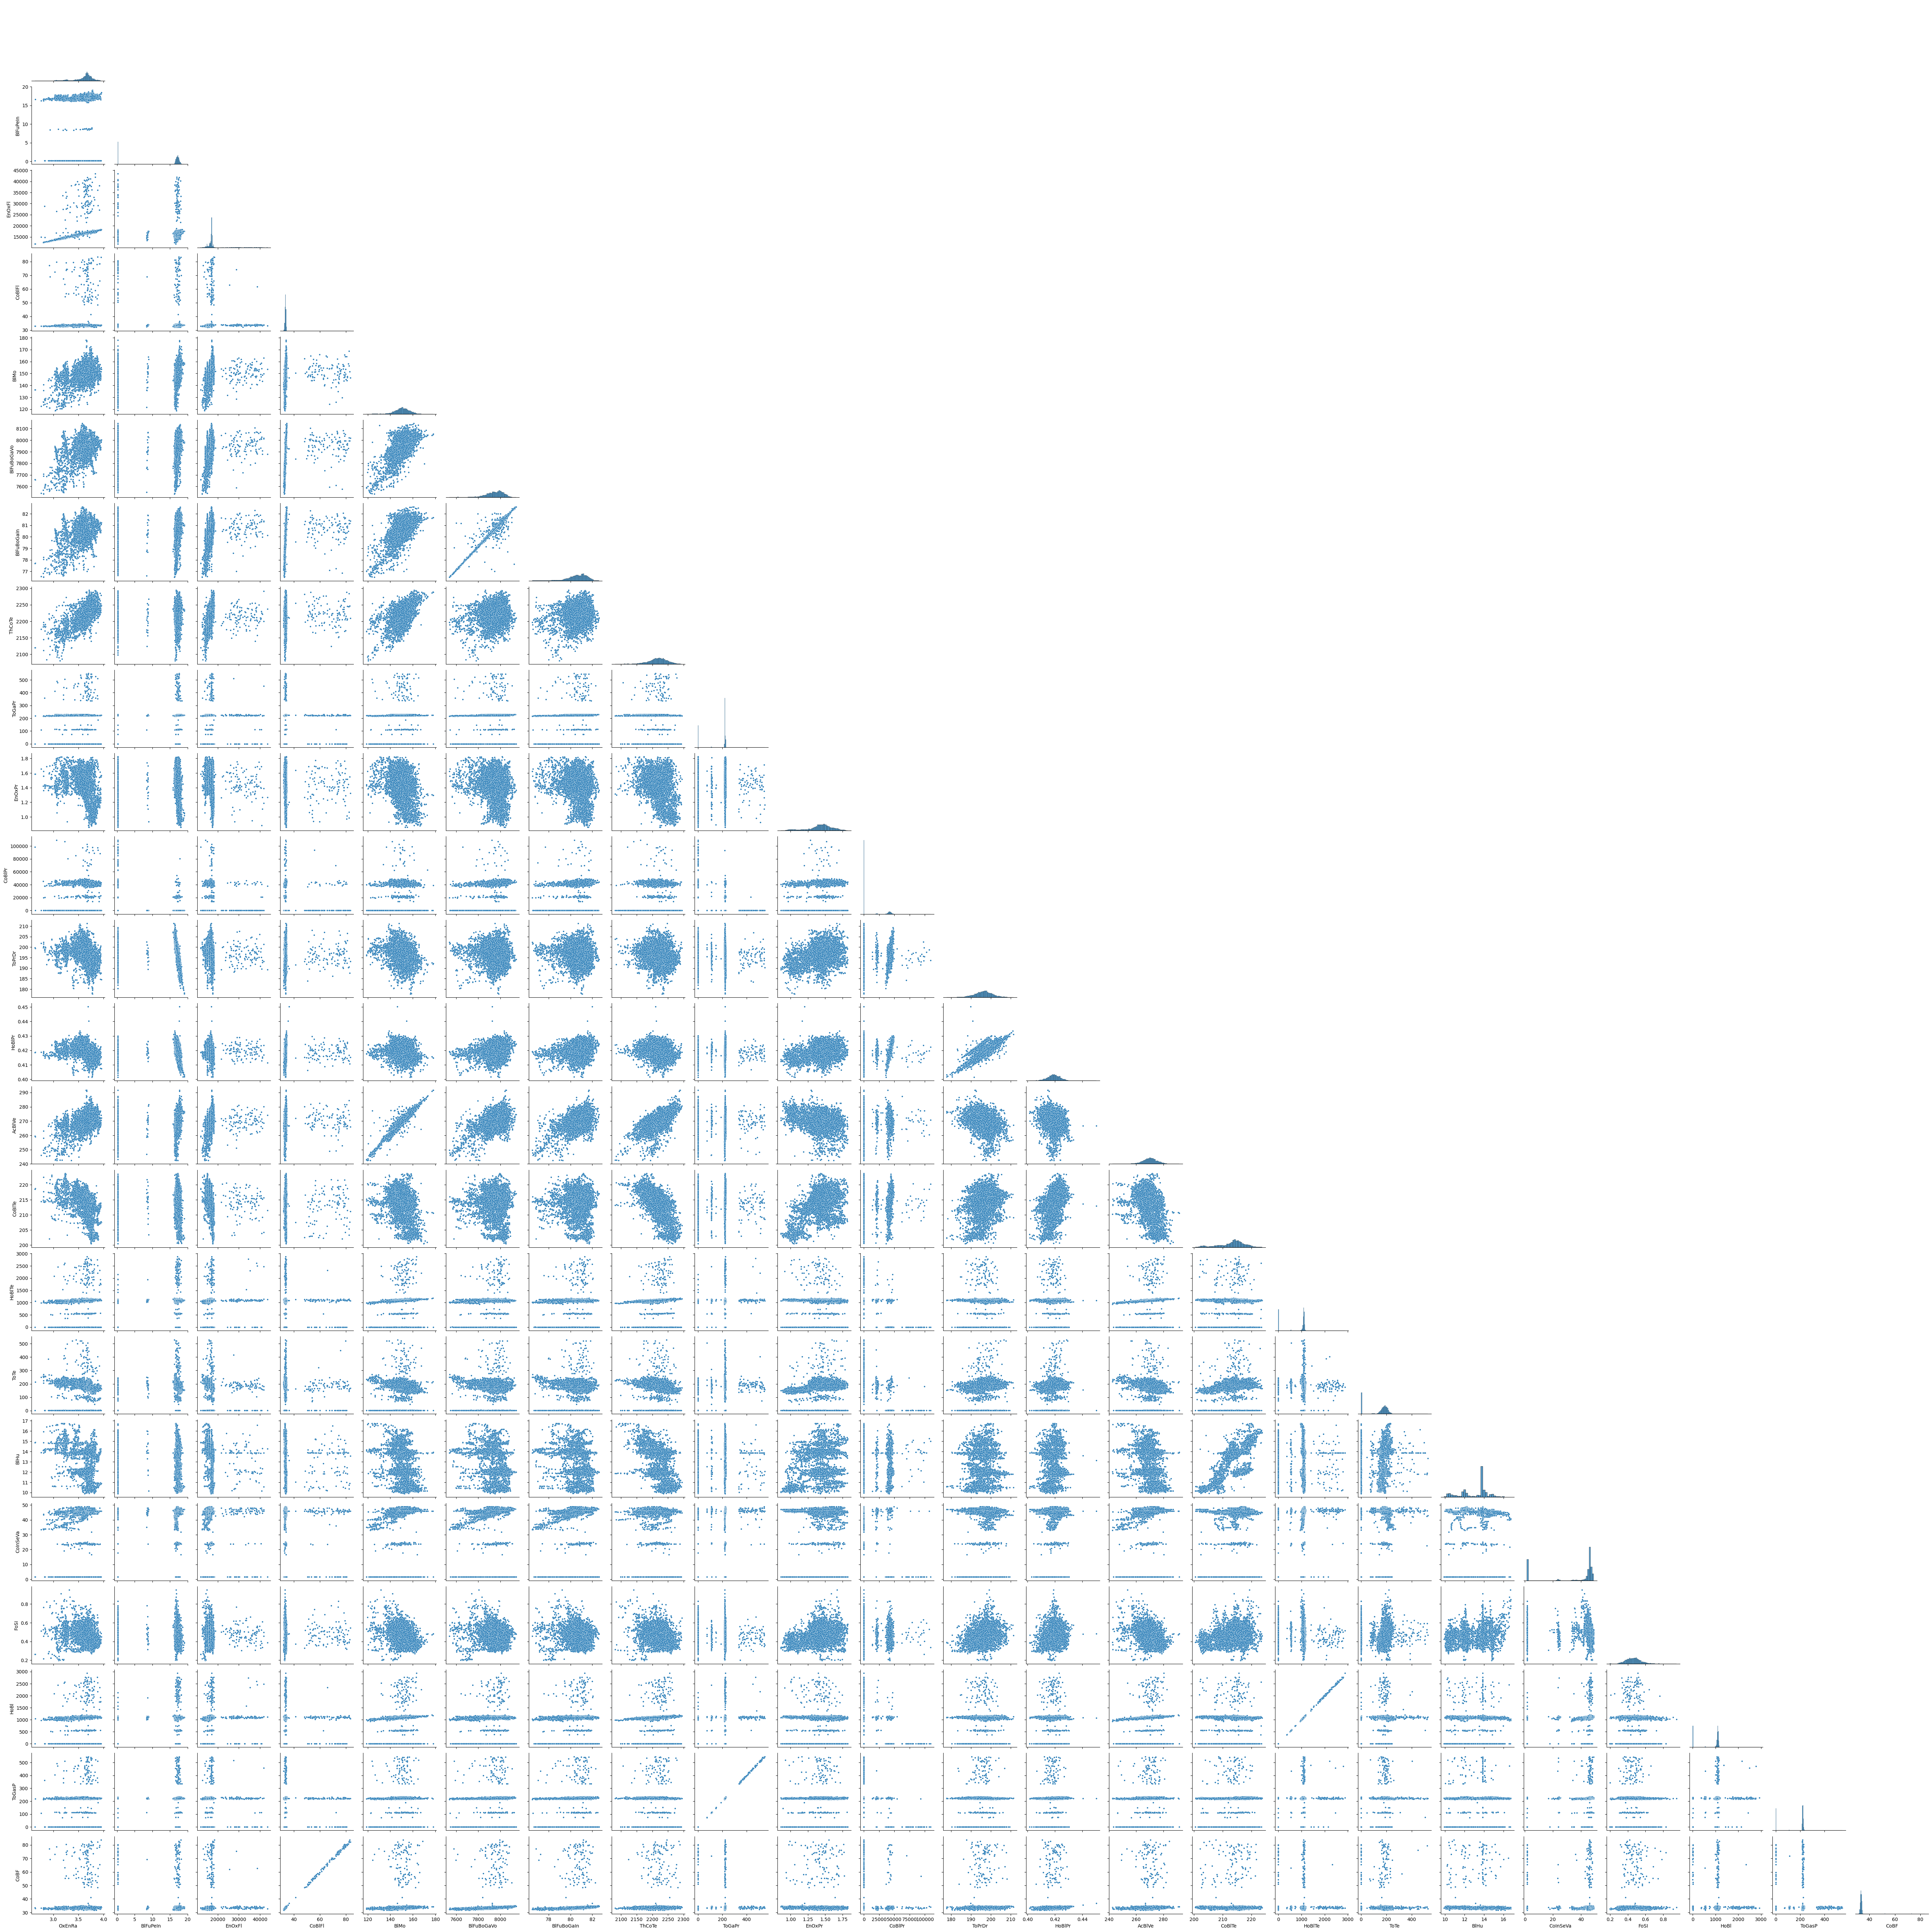

In [67]:
# plotting inter-correlation bw X variables
import seaborn as sns

x_vars = df.iloc[:,1:-1]

sns.pairplot(x_vars, plot_kws={'s': 10}, corner=True)
plt.show()